## IDS2017

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DAGMM
dagmm_misclf_df = pd.read_csv("dagmm_experiments/dagmm_misclassifications.csv", index_col=0)
dagmm_misclf_df = dagmm_misclf_df.drop(index=["BENIGN"])
n_instances = dagmm_misclf_df["# Instances test set"].sum()
dagmm_misclf_df["Accuracy"] = 1 - dagmm_misclf_df["Misclassified ratio"]
dagmm_misclf_df["Ratio"] = dagmm_misclf_df["# Instances test set"] / n_instances
dagmm_misclf_df = dagmm_misclf_df.sort_index()

# DeepSVDD
deepsvdd_misclf_df = pd.read_csv("deepsvdd_experiments/deepsvdd_misclassifications.csv", index_col=0)
deepsvdd_misclf_df = deepsvdd_misclf_df.drop(index=["BENIGN"])
deepsvdd_misclf_df["Instances ratio"] = deepsvdd_misclf_df["# Instances test set"] / n_instances
deepsvdd_misclf_df["Accuracy"] = 1 - deepsvdd_misclf_df["Misclassified ratio"]
deepsvdd_misclf_df["Ratio"] = dagmm_misclf_df["# Instances test set"] / n_instances
deepsvdd_misclf_df = deepsvdd_misclf_df.sort_index()

# MemAE
memae_misclf_df = pd.read_csv("memae_experiments/memae_misclassifications.csv", index_col=0)
memae_misclf_df = memae_misclf_df.drop(index=["BENIGN"])
memae_misclf_df["Instances ratio"] = memae_misclf_df["# Instances test set"] / n_instances
memae_misclf_df["Accuracy"] = 1 - memae_misclf_df["Misclassified ratio"]
memae_misclf_df["Ratio"] = dagmm_misclf_df["# Instances test set"] / n_instances
memae_misclf_df = memae_misclf_df.sort_index()

In [14]:
dagmm_misclf_df

,# Instances test set,Misclassified count,Misclassified ratio,Accuracy,Ratio
Bot,1966,806,0.409969,0.590031,0.003526
DDoS,128027,106668,0.833168,0.166832,0.229586
DoS,252658,103681,0.410361,0.589639,0.453082
FTP-Patator,7938,4652,0.586042,0.413958,0.014235
Heartbleed,11,2,0.181818,0.818182,0.000020
Infiltration,36,13,0.361111,0.638889,0.000065
PortScan,158930,4506,0.028352,0.971648,0.285003
SSH-Patator,5897,5855,0.992878,0.007122,0.010575
Web Attack,2180,356,0.163303,0.836697,0.003909


In [11]:
deepsvdd_misclf_df

,# Instances test set,Misclassified count,Misclassified ratio,Accuracy,Instances ratio,Ratio
BENIGN,1136374,172471,0.151773,0.848227,0.670816,0.670816
Bot,1966,1854,0.943032,0.056968,0.001161,0.001161
DDoS,128027,7312,0.057113,0.942887,0.075576,0.075576
DoS,252658,72053,0.285180,0.714820,0.149147,0.149147
FTP-Patator,7938,7835,0.987024,0.012976,0.004686,0.004686
Heartbleed,11,0,0.000000,1.000000,0.000006,0.000006
Infiltration,36,3,0.083333,0.916667,0.000021,0.000021
PortScan,158930,78016,0.490883,0.509117,0.093818,0.093818
SSH-Patator,5897,5889,0.998643,0.001357,0.003481,0.003481
Web Attack,2180,2075,0.951835,0.048165,0.001287,0.001287


In [12]:
memae_misclf_df

,# Instances test set,Misclassified count,Misclassified ratio,Instances ratio,Accuracy,Ratio
BENIGN,1136374,242366,0.213280,0.670816,0.786720,0.670816
Bot,1966,1852,0.942014,0.001161,0.057986,0.001161
DDoS,128027,26747,0.208917,0.075576,0.791083,0.075576
DoS,252658,37586,0.148762,0.149147,0.851238,0.149147
FTP-Patator,7938,3824,0.481733,0.004686,0.518267,0.004686
Heartbleed,11,0,0.000000,0.000006,1.000000,0.000006
Infiltration,36,3,0.083333,0.000021,0.916667,0.000021
PortScan,158930,82059,0.516322,0.093818,0.483678,0.093818
SSH-Patator,5897,2949,0.500085,0.003481,0.499915,0.003481
Web Attack,2180,2082,0.955046,0.001287,0.044954,0.001287


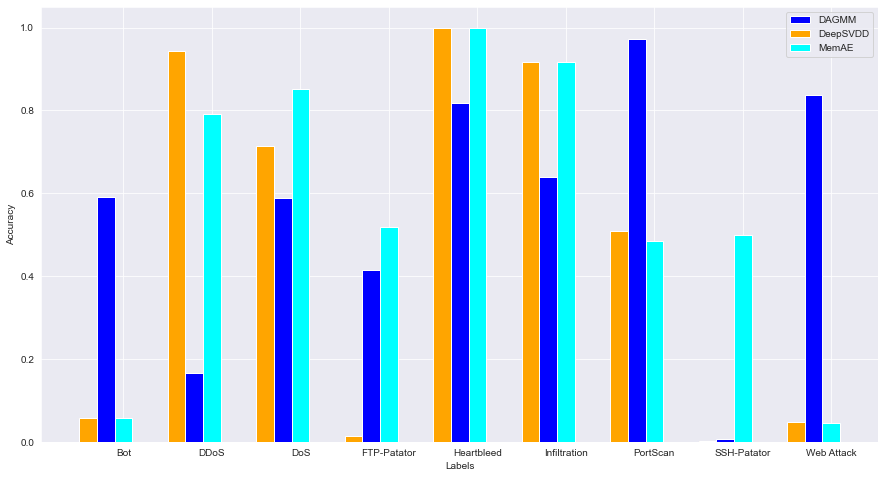

In [24]:
# create data
x = np.arange(len(dagmm_misclf_df.index))
y1 = dagmm_misclf_df["Accuracy"]
y2 = deepsvdd_misclf_df["Accuracy"]
y3 = memae_misclf_df["Accuracy"]
width = 0.2

f, ax = plt.subplots(figsize=(15, 8))
# plot data in grouped manner of bar type
ax.bar(x - 0.2, y1, width, color="blue")
ax.bar(x - 0.4, y2, width, color="orange")
ax.bar(x, y3, width, color="cyan")

plt.xticks(x, dagmm_misclf_df.index)
plt.xlabel("Labels")
plt.ylabel("Accuracy")
plt.legend(["DAGMM", "DeepSVDD", "MemAE"])
plt.show()

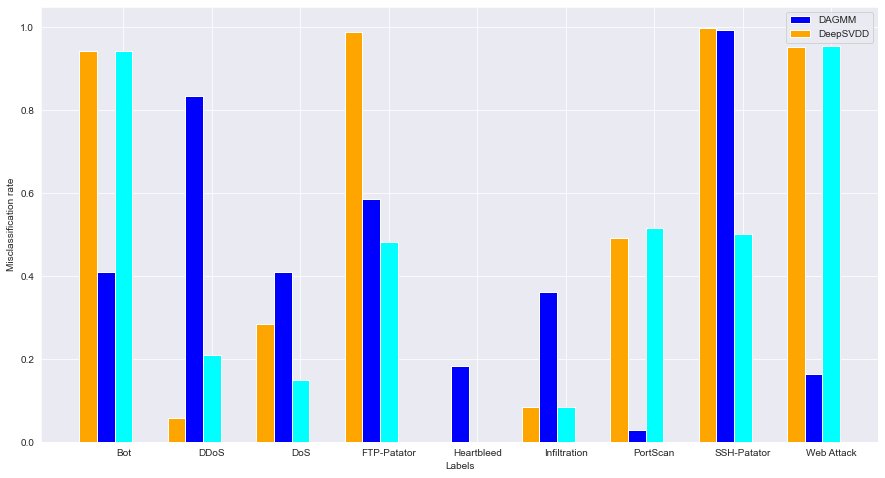

In [16]:
# create data
x = np.arange(len(dagmm_misclf_df.index))
y1 = dagmm_misclf_df["Misclassified ratio"]
y2 = deepsvdd_misclf_df["Misclassified ratio"]
y3 = memae_misclf_df["Misclassified ratio"]

width = 0.2

f, ax = plt.subplots(figsize=(15, 8))
# plot data in grouped manner of bar type
ax.bar(x - 0.2, y1, width, color="blue")
ax.bar(x - 0.4, y2, width, color="orange")
ax.bar(x, y3, width, color="cyan")

plt.xticks(x, dagmm_misclf_df.index)
plt.xlabel("Labels")
plt.ylabel("Misclassification rate")
plt.legend(["DAGMM", "DeepSVDD"])
plt.show()